# **Panduan Coding Di Google Colab**

Kita akan Menggunakan dataset "Sales Data" yang tersedia di Github, yang bisa langsung dibaca oleh Pandas.

Pertama, mari kita siapkan Google Colab.

In [2]:
# Import Libraray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Membaca File CSV dari URL**

Kali ini, kita akan membaca file CSV langsung dari GitHub. Ini akan menghindari proses unduh manual dan unggah ke Colab.

**Link Dataset (langsung ke raw CSV):** https://raw.githubusercontent.com/intern2grow/sales-data-analysis/master/sales_data.csv

In [ ]:
# URL file CSV
csv_url = 'https://raw.githubusercontent.com/intern2grow/sales-data-analysis/master/sales_data.csv'

# Membaca file CSV ke dalam DataFrame Pandas
try:
    df_sales = pd.read_csv(csv_url)
    print("Dataset berhasil dimuat!")
except Exception as e:
    print(f"Terjadi kesalahan saat memuat dataset: {e}")
    print("Pastikan URL sudah benar dan koneksi internet stabil.")

# Menampilkan 5 baris pertama dari DataDrame
print(f"\n5 Baris pertama DataFrame: ")
print(f"{df_sales.head()}")

# Menampilkan informasi dasar mengenai DataFrame
print(f"\nInformasi DataFrame:")
print(f"{df_sales.info()}")

# Menampilkan statistik deskriptif dasar
print(f"\nStatistik deskriptif dasar:")
print(f"{df_sales.describe()}")

## **Operasi Dasar: Filtering dan Sorting**

Mari Kita coba beberapa operasi filtering dan sorting

**Filtering:**

Misalnya, kita ingin melihat semua penjualan dengan 'Quantity Ordered' di atas 5.

In [ ]:
 # Filter data penjualan dengan Quantity di atas 6
 high_quantity_sales = df_sales[df_sales.quantity > 12]
 print("\nPenjualan dengan Quantity > 6:")
 print(high_quantity_sales.head())

# Filter data untuk product Headphones
headphones_sales = df_sales[df_sales['product'] == "Headphones"]
print("\nPenjualan Headphones:")
print(headphones_sales.head())

high_price_sales = df_sales[df_sales['price'] >= 100]
print("\nPenjualan dengan harga satuan di atas $100:")
print(high_price_sales.head())

## **Sorting:**

Kita akan mengurutkan data berdasarkan 'revenue' secara menurun.

In [ ]:
# Mengurutkan data berdasarkan 'revenue' secara menurun
df_sorted_revenue = df_sales.sort_values(by=['revenue'], ascending=False)
print("\nData penjualan diurutkan berdasarkan Revenue (menurun):")
print(df_sorted_revenue.head())

# Mengurutkan data berdasarkan 'quantity' secara menaik
df_sorted_quantity = df_sales.sort_values('quantity')
print("\nData penjualan diurutkan berdasarkan Quantity (menaik):")
print(df_sorted_quantity.head())

## **Agregasi Sederhana dan Statistik Dasar**

Sekarang, mari kita hitung beberapa statistik dasar.

Pastikan kolom 'price_each', 'quantity_ordered', dan 'revenue' adalah numerik.

In [11]:
# Menghitung statistik dasar untuk kolom 'revenue'
mean_revenue = df_sales['revenue'].mean()
median_revenue = df_sales['revenue'].median()
mode_revenue = df_sales['revenue'].mode()[0] # mode bisa lebih dari satu, ambil yang pertama
min_revenue = df_sales['revenue'].min()
max_revenue = df_sales['revenue'].max()
count_revenue = df_sales['revenue'].count()

print(f"\nStatistik Pendapatan (Revenue):")
print(f"Mean Revenue: ${mean_revenue:,.2f}")
print(f"Median Revenue: ${median_revenue:,.2f}")
print(f"Modus Revenue: ${mode_revenue:,.2f}")
print(f"Minimum Revenue: ${min_revenue:,.2f}")
print(f"Maximum Revenue: ${max_revenue:,.2f}")
print(f"Jumlah Transaksi: {count_revenue}")

# Agregasi: Total penjualan per produk
sales_by_product = df_sales.groupby('product')['revenue'].sum().sort_values(ascending=False) # sort_values tidak bisa menerima argumen lagi, karena otomatis dari 'revenue'
print("\nTotal Penjualan per Produk:")
print(sales_by_product.head())

# Agregasi: Rata-rata harga per produk
avg_price_by_product = df_sales.groupby('product')['price'].mean().sort_values(ascending=False)
print("\nRata-rata Harga Satuan per Produk:")
print(avg_price_by_product.head())


Statistik Pendapatan (Revenue):
Mean Revenue: $2,060.68
Median Revenue: $1,200.00
Modus Revenue: $500.00
Minimum Revenue: $300.00
Maximum Revenue: $7,200.00
Jumlah Transaksi: 368

Total Penjualan per Produk:
product
Smartphone    434400.0
Smartwatch     58800.0
Speaker        39680.0
Coat           33800.0
Watch          32700.0
Name: revenue, dtype: float64

Rata-rata Harga Satuan per Produk:
product
Laptop        1200.0
Smartphone     600.0
Tablet         400.0
Smartwatch     200.0
Watch          150.0
Name: price, dtype: float64


## **Visualisasi Dasar**

Kita akan membuat beberapa visualisasi sederhana untuk lebih memahami data.

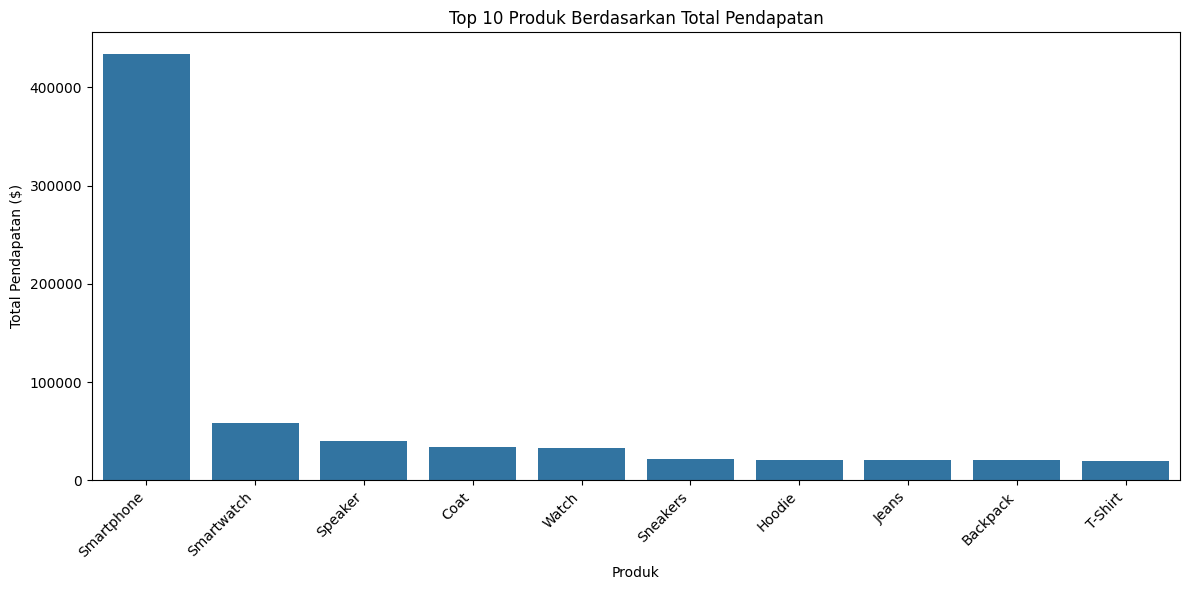

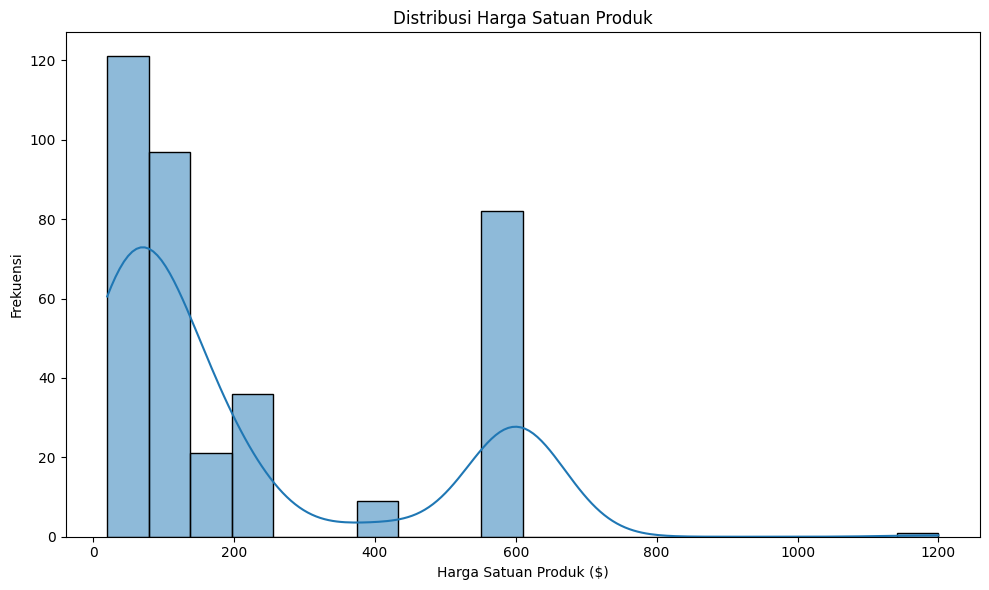

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_product.head(10).index, y=sales_by_product.head(10).values)
plt.title('Top 10 Produk Berdasarkan Total Pendapatan')
plt.xlabel('Produk')
plt.ylabel('Total Pendapatan ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_sales['price'].dropna(), bins=20, kde=True)
plt.title('Distribusi Harga Satuan Produk')
plt.xlabel('Harga Satuan Produk ($)')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()